In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Churn prediction project

We will classify clients of a Telecom company based on whether or not they are about to churn - we will assign a probability between 0 and 1 which will represent the likelyhood of them leaving or **churning**. 

This will be approached with **binary classification**:

$$g(x_i)\approx y_i$$

Where $i$ represents $i^{th}$ customer. 

$$ g_i \in \{0, 1\} $$

Where $0$ represents the **Negative case**, while $1$ represents the **Positive** one.

### 3.2 Data Preparation

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


Make them all have the same style!

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns: 
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [11]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [17]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [20]:
df.totalcharges = df.totalcharges.fillna(0)

In [21]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Churn is categorical - this is the variable we interested in.

In [22]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [24]:
df.churn = (df.churn == 'yes').astype(int)

### 3.3 Validation framework

Split into train/val/test like 60/20/20 with `scikit-learn`.

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [29]:
len(df_full_train), len(df_test)

(5634, 1409)

Need to split one extra time to get the validation set.

In [32]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [34]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [35]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [36]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [38]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

### 3.4 EDA

In [40]:
df_full_train = df_full_train.reset_index(drop=True)

In [41]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

No missing values


In [47]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

We have churn rate of 0.269968.

Another way to calculate it:

In [49]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [51]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [52]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [53]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [55]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.5 Feature importance: Churn rate and risk ratio

**Churn rate**

In [60]:
churn_female = df_full_train.query("gender == 'female'").churn.mean()
churn_female

0.27682403433476394

In [61]:
churn_male = df_full_train.query("gender == 'male'").churn.mean()
churn_male

0.2632135306553911

In [62]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [63]:
churn_partner = df_full_train.query("partner == 'yes'").churn.mean()
churn_partner

0.20503330866025166

In [64]:
churn_no_partner = df_full_train.query("partner == 'no'").churn.mean()
churn_no_partner

0.3298090040927694

Gender doesn't matter, whether or not the customer has a partner matters really a lot!

This is one of the ways to measure **feature importance**:
1. Difference : 
    - $global - group > 0$ means less likely to churn
    - $global - group < 0$ means more likely to churn
2. Risk ratio :
    - $risk = \frac{group}{global} > 1$ means more likely to churn
    - $risk = \frac{group}{global} < 1$ means less likely to churn
    
    
**Risk ratio**:

In [65]:
churn_no_partner / global_churn

1.2216593879412643

In [66]:
churn_partner / global_churn

0.7594724924338315

In [67]:
churn_partner

0.20503330866025166

In [68]:
churn_no_partner

0.3298090040927694

Implement this as groupby:

In [74]:
from IPython.display import display

In [75]:
for c in categorical: 
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


Use a single number to represent feature importance:

### 3.6 Feature importance: Mutual information

**Mutual information** tells us about the mutual dependence between two variables. 

i.e., How much do we learn about churn if we observe the variable **contract**

In [76]:
from sklearn.metrics import mutual_info_score

In [77]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [78]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

Order doesn't matter. We learn a bit about customer based on contract! What about gender?

In [80]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

Not important.

In [81]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

Partner isn't as relevant as contract.

In [82]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [86]:
mi = (df_full_train[categorical]
     .apply(mutual_info_churn_score)
     .sort_values(ascending=False))
mi

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

Contract and online security are the most important variables.

The first 6 variables are the most important ones. We can learn quite a lot about a customer based on them.

This is the kind of patterns Machine Learning models typically learn.

### 3.7 Feature importance: Correlation

How about numerical columns?

- Pearson Correlation coefficient:

$$ -1 \le r \le 1$$

And the closer the value of $r$ is to $-1$ or $1$, the more correlated the $x$ and $y$ are.

Here:

$$ y \in \{0, 1\} $$
$$ x \in \mathbf{R}$$

In [87]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

Tenure variable is the most negatively correlated here.

Tenure correlates with total charges actually!

In [88]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [89]:
df_full_train[
    (df_full_train.tenure > 2) & 
    (df_full_train.tenure <= 12)
].churn.mean()

0.3994413407821229

In [92]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

Monthly charges has the reverse trend, as it's positively correlated.

### 3.8 One-hot encoding

Encode categorical features.

`DictVectorizer` doesn't actually perform any transformations on **numerical variables**!

In [93]:
from sklearn.feature_extraction import DictVectorizer

In [127]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
test_dicts = df_test[categorical + numerical].to_dict(orient='records')

In [119]:
dv = DictVectorizer(sparse=False)

In [120]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [121]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [124]:
list(dv.transform(dicts)[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

Can do `fit` and `transform` in a single step:

In [130]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.fit_transform(val_dicts)
X_test = dv.fit_transform(test_dicts)

### 3.9 Logistic regression

To remind:

$$g(x_i) = y_i$$

We are doing **Binary Classification** here, where $Logistic\ Regression$ performs very well!

$$ g(x_i) \rightarrow 0-1 $$

It's implemented similar to $Linear\ Regression$. Remember the $Linear\ Regression$ is given by:

$$g(x_i) = w_0 + w^Tx_i$$

$Logistic\ Regression$  is implemented similarly:

$$g(x_i) = sigmoid(w_0 + w^Tx_i)$$

But the output of the model $y_i \in \{0, 1\}$

$Sigmoid$ is given by:
$$\frac{1}{1 + e(-z)}$$

In [131]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [135]:
z = np.linspace(-7, 7, 51)

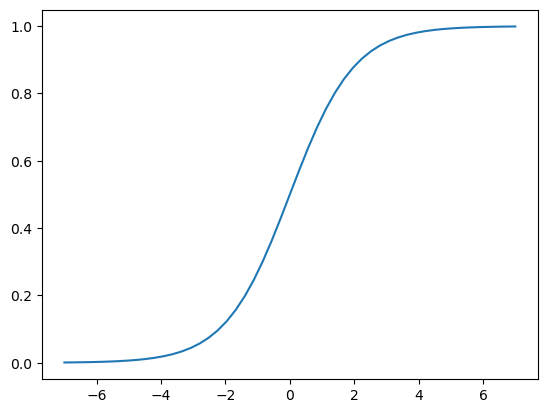

In [137]:
plt.plot(z, sigmoid(z))

In [139]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [141]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

The only difference between the two is the sigmoid function! Both models are **linear** because they use the **dot product**!

### 3.10 Training logistic regression with Scikit-Learn

- Train a model with sklearn
- apply it to validation dataset
- Calculate the accuracy 

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
model = LogisticRegression()

In [144]:
model.fit(X_train, y_train)

LogisticRegression()

In [147]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [148]:
model.intercept_[0]

-0.10904479046070133

In [150]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

The above are **hard predictions** - they already have th appropriate labe. In order to get **soft predictions**, use `predict_proba`:

In [158]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00899456, 0.20447551, 0.21218361, ..., 0.13636236, 0.79975428,
       0.83739606])

First column is negative class, the second is the positive!

In [160]:
churn_decision = y_pred >= 0.5

In [162]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

Measure how precise our model is:

In [163]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [164]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

Measure accuracy:

In [165]:
(y_val == churn_decision).mean()

0.8034066713981547

$80\%$ of our decisions match

In [171]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [173]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred.head()

,probability,prediction,actual,correct
0,0.008995,0,0,True
1,0.204476,0,0,True
2,0.212184,0,0,True
3,0.543029,1,1,True
4,0.213752,0,0,True


In [174]:
df_pred.correct.mean()

0.8034066713981547

This is the longer way to measure $accuracy$. 

Model is correct $80\%$ of time. It's time to **interpret** the model.

### 3.11 Model Interpretation

- Look at the coefficients
- Train a model with fewer features

In [179]:
dict(zip(dv.feature_names_, model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [180]:
small = ['contract', 'tenure', 'monthlycharges']

In [185]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [186]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')
dicts_test_small = df_test[small].to_dict(orient='records')

In [187]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [189]:
dv_small.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [190]:
X_train_small = dv_small.transform(dicts_train_small)
X_val_small = dv_small.transform(dicts_val_small)

In [191]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [193]:
model_small.intercept_[0]

-2.476775664719812

In [194]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [195]:
dict(zip(dv_small.feature_names_, w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

We have $-2.47$ as our bias term, then we have

$$ 0.97 + (-0.025) + (-0.949)$$

As our terms representing the **contract variable**. Then $+ 0.027$ for **monthlycharges** and $- 0.036$ for **tenure**.

E.g. If we have a user with a $50\$$ monthly contract with 5 months of tenure:

In [199]:
-2.47 + 1 * 0.97 + 0 * (-0.025) + 0 * (-0.949) + 50 * 0.027 + 5 * (-0.036)

-0.3300000000000001

Then apply the sigmoid:

In [200]:
sigmoid(_)

0.41824062315816374

Meaning, that most probably this user won't churn.

#### Note:

In jupyter $\_$ variable means "use whatever is the output from the previous cell".

### 3.12 Using the model

In [203]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [205]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [206]:
y_full_train = df_full_train.churn.values

In [207]:
model = LogisticRegression().fit(X_full_train, y_full_train)

In [208]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [209]:
X_test = dv.transform(dicts_test)

In [210]:
y_pred = model.predict_proba(X_test)[:, 1]

In [212]:
churn_decision = y_pred >= 0.5

In [213]:
(churn_decision == y_test).mean()

0.815471965933286

In [216]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [221]:
X_small = dv.transform([customer])
X_small.shape

(1, 45)

In [222]:
model.predict_proba(X_small)

array([[0.5943189, 0.4056811]])

This customer is not likely to churn.

In [223]:
y_test[10]

0

Let's select a customer that will churn:

In [224]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [225]:
X_small = dv.transform([customer])
X_small.shape

(1, 45)

In [226]:
model.predict_proba(X_small)

array([[0.40311479, 0.59688521]])

In [229]:
y_test[-1]

1